<a href="https://colab.research.google.com/github/NicholasDow/Folder-of-Fail/blob/main/One_hot_to_cat_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('drive/MyDrive/car-accident-data.csv')

In [ ]:
df['Accident year'] = df['Accident year'].astype(str)

In [ ]:
df = df.loc[np.repeat(df.index.values, df["Accidents"])]

In [ ]:
df = df.drop(columns=['Accidents'])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Getting rid of the unknown 
# print("shape before", df.shape)
# df = df.mask(df.eq('Unknown')).dropna()
# print("shape after", df.shape)

shape before (240091, 8)
shape after (232240, 8)


In [ ]:
df

,Accident year,Accident severity,Region,Ons code,Speed limit,Light condition,Weather condition,Road surface
0,2018,Fatal,North East,E12000001,1-20 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
...,...,...,...,...,...,...,...,...
10254,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining no high winds,Wet or damp
10254,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining no high winds,Wet or damp
10255,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining + high winds,Wet or damp
10255,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining + high winds,Wet or damp


In [ ]:
# This didn't work either
#df['Speed limit'] = df['Speed limit'].replace({"1-20 mph": 10, "21-30 mph": 25, "31-40 mph": 35, "41-50 mph": 45, "51-60 mph":55, "61-70 mph": 65, "Motorway": 80})

In [ ]:
X = df.drop(columns=['Accident severity'])
y = df['Accident severity']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.6, random_state=1)

In [ ]:
cats = list(X.columns)

In [ ]:
cats

['Accident year',
 'Region',
 'Ons code',
 'Speed limit',
 'Light condition',
 'Weather condition',
 'Road surface']

In [ ]:
cats.remove('Speed limit')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [ ]:
transformer_num = make_pipeline(
    StandardScaler(),
)
transformer_cat = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_cat, cats),
)

In [ ]:
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis=1)
slight = X[X['Accident severity'] == 'Slight']
fatal = X[X['Accident severity'] == 'Fatal']
serious = X[X['Accident severity'] == 'Serious']
n = len(slight)
fatal_upsample = resample(fatal, replace = True, n_samples= n, random_state=0)
serious_upsample = resample(serious, replace= True, n_samples=n, random_state=0)
upsampled = pd.concat([slight, fatal_upsample, serious_upsample])
print(upsampled)
X_train = upsampled.drop(columns=['Accident severity'])
y_train = upsampled['Accident severity']

     Accident year                    Region  ... Road surface Accident severity
4103          2018                South East  ...  Wet or damp            Slight
9270          2019                    London  ...          Dry            Slight
4516          2018                South West  ...          Dry            Slight
8238          2019             East Midlands  ...          Dry            Slight
9619          2019                South West  ...          Dry            Slight
...            ...                       ...  ...          ...               ...
6048          2019  Yorkshire and the Humber  ...  Wet or damp           Serious
5827          2019                North East  ...          Dry           Serious
1676          2018                    London  ...          Dry           Serious
6471          2019           East of England  ...          Dry           Serious
1301          2018           East of England  ...          Dry           Serious

[330063 rows x 8 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# I want to see the cardinality here

In [ ]:
from sklearn.metrics import accuracy_score

# Bundle preprocessing and modeling code in a pipeline, (don't use this anymore)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])



In [ ]:

my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)


# Evaluate the model
score = accuracy_score(y_valid, preds)
print('accuracy:', score)
print('f1', sklearn.metrics.f1_score(y_valid, preds, average='micro'))

NameError: ignored

In [ ]:
print('f1', sklearn.metrics.f1_score(y_valid, preds, average='macro'))

f1 0.3157956746566892


In [ ]:
score = accuracy_score(y_valid, preds)
print('accuracy:', score)
print('f1', sklearn.metrics.f1_score(y_valid, preds, average='micro'))

accuracy: 0.4996147358337325
f1 0.4996147358337325


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_valid, preds)

array([[  348,   135,   185],
       [ 2860,  2143,  4351],
       [ 8688,  7809, 21500]])

In [ ]:
np.unique(preds)

array(['Fatal', 'Serious', 'Slight'], dtype=object)

In [ ]:
# OH my god I am retarded, trying isolation forest this time

I don't know if a NN will work but I think it is a good experience to try this method too

In [ ]:
from tensorflow.keras import layers
# This basically allows you to modify columns based on their feature
from tensorflow import feature_column
import tensorflow as tf
feature_columns = []

In [ ]:
X_train

,Accident year,Region,Ons code,Speed limit,Light condition,Weather condition,Road surface
4103,2018,South East,E12000008,80,Daylight,Raining no high winds,Wet or damp
9270,2019,London,E12000007,10,Daylight,Fine no high winds,Dry
4516,2018,South West,E12000009,25,Daylight,Fine no high winds,Dry
6877,2019,London,E12000007,25,Daylight,Fine no high winds,Dry
8238,2019,East Midlands,E12000004,45,Daylight,Fine no high winds,Dry
...,...,...,...,...,...,...,...
4229,2018,London,E12000007,25,Daylight,Fine no high winds,Dry
5118,2018,Scotland,S92000003,55,Daylight,Fine no high winds,Dry
2921,2018,East Midlands,E12000004,25,Daylight,Fine no high winds,Dry
3243,2018,West Midlands,E12000005,25,Darkness - lights lit,Fine no high winds,Dry


In [ ]:
# We just apply the pipeline here
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
input_shape = [X_train.shape[1]]

In [ ]:
model = tf.keras.Sequential([
  layers.Dense(64, activation='relu', input_shape = input_shape),
  layers.Dense(64, activation='relu'),
  layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
from keras.utils import to_categorical
import keras

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Note that you need to remeber what a label encoder is, it really fucked you over to have forgotten it.

to_categorical(LabelEncoder().fit_transform(y_train))

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
y_train = to_categorical(LabelEncoder().fit_transform(y_train))
y_valid = to_categorical(LabelEncoder().fit_transform(y_valid))
print(y_train[0])


[0. 0. 1.]


In [ ]:
# y_train[0][:,1]
# # Oh this an annoy bug, will have to ask if there is a better way later
# y_train= [ i[:,1] for i in y_train ]
# y_valid= [ i[:,1] for i in y_valid ]

In [ ]:
# y_train = np.stack(y_train)
# y_valid = np.stack(y_valid)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.1,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=8000,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)

Epoch 1/200
42/42 [==============================] - 2s 30ms/step - loss: 1.0552 - accuracy: 0.4273 - val_loss: 1.0492 - val_accuracy: 0.4041
Epoch 2/200
42/42 [==============================] - 2s 29ms/step - loss: 1.0509 - accuracy: 0.4317 - val_loss: 1.0389 - val_accuracy: 0.4249
Epoch 3/200
42/42 [==============================] - 2s 29ms/step - loss: 1.0483 - accuracy: 0.4324 - val_loss: 1.0611 - val_accuracy: 0.3744
Epoch 4/200
42/42 [==============================] - 2s 30ms/step - loss: 1.0458 - accuracy: 0.4341 - val_loss: 1.0576 - val_accuracy: 0.3714
Epoch 5/200
42/42 [==============================] - 2s 30ms/step - loss: 1.0437 - accuracy: 0.4358 - val_loss: 1.0594 - val_accuracy: 0.4104
Epoch 6/200
42/42 [==============================] - 2s 30ms/step - loss: 1.0414 - accuracy: 0.4371 - val_loss: 1.0376 - val_accuracy: 0.4246
Epoch 7/200
42/42 [==============================] - 2s 30ms/step - loss: 1.0394 - accuracy: 0.4381 - val_loss: 1.0482 - val_accuracy: 0.3940
Epoch 

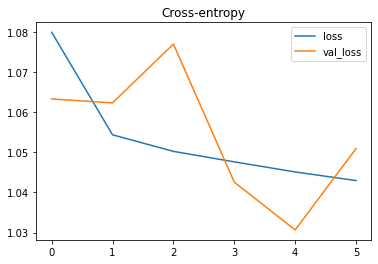

In [ ]:
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")



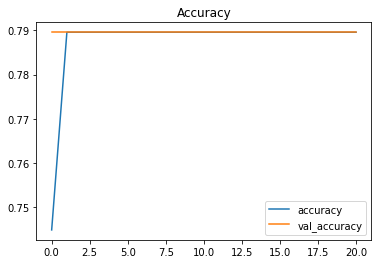

In [ ]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")


In [ ]:
model(X_valid[:5])

AttributeError: ignored

In [ ]:
y_valid.count()

AttributeError: ignored

In [ ]:
df['Accident severity'].value_counts()

Slight     183368
Serious     45601
Fatal        3271
Name: Accident severity, dtype: int64